# KNN on IRIS DATASET

#### By Muhammad Arham
#### 1001686912

In [150]:
#IMPORTS

import pandas as pd
import numpy as np
import math
import operator
from collections import Counter

In [209]:
# REFERENCES

#https://stackoverflow.com/questions/1401712/how-can-the-euclidean-distance-be-calculated-with-numpy
#https://stackoverflow.com/questions/18424228/cosine-similarity-between-2-number-lists
#https://stackoverflow.com/questions/38161071/how-to-calculate-normalized-euclidean-distance-on-two-vectors/54170399
#https://pythonspot.com/matplotlib-bar-chart/
#https://www.youtube.com/watch?v=0y0UIwODaRE

### Importing the IRIS DATASET

In [151]:
col=['sepal_length','sepal_width','petal_length','petal_width','class']
data=pd.read_csv("iris.data", header = None, names = col )

In [152]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [153]:
 from sklearn.model_selection import train_test_split

### Splitting data into development and test set

In [306]:
x=iris.iloc[:,:4]
y=iris["class"]

# 80/20 split of dataset
x_develop,x_test,y_develop,y_test=train_test_split(x,y,test_size=0.2,random_state=np.random)
# converting dataframe into numpy arrays for easier iteration later on
x_develop,x_test,y_develop,y_test = np.array(x_develop),np.array(x_test),np.array(y_develop),np.array(y_test)

### Hyperparameter Calculations

#### Euclidean Distance

In [307]:
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2
        ##distance += scipy.spatial.distance.euclidean(row1,row2)
    return math.sqrt(distance)


#### Cosine Similarity

In [318]:
def cosine_similarity(row1, row2):
    sim = 0.0
    #sim = np.inner(row1, row2) / (norm(row1) * norm(row2))
    #
    dot = np.dot(row1, row2)
    norm1 = np.linalg.norm(row1)
    norm2 = np.linalg.norm(row2)
    sim = dot / (norm1 * norm2)
    return sim


#### Normalized Euclidean Distance

In [175]:
def normalized_euclidean_distance(row1, row2):
    distance = 0.0
    distance = 0.5*(np.std(row1-row2)**2) / (np.std(row1)**2+np.std(row2)**2)
    return distance


In [248]:
def intersection(lst1, lst2): 
    lst3 = [value for value in lst1 if value in lst2] 
    return lst3 

## KNN Algorithm

In [323]:
###Calculating Distances between test and development set rows
## using above mentioned distance metrics
def KNN_algo(x_test,x_develop,k,metric):
    rows = x_test.shape[0]
    columns = x_develop.shape[0]

    ##initializing arrays of array
    Edistance = np.zeros((rows,columns))
    Cdistance = np.zeros((rows,columns))
    NEdistance = np.zeros((rows,columns))


    for row in range(rows):
        for col in range(columns):
            #for euclidean
            Edistance[row,col] = euclidean_distance(x_test[row], x_develop[col])
            #for cosine similarity
            Cdistance[row,col] = cosine_similarity(x_test[row], x_develop[col])
            #for normalized euclidean distance
            NEdistance[row,col] = normalized_euclidean_distance(x_test[row], x_develop[col])

    #print (Edistance)#Euclidean distance
    #print (Cdistance)#Cosine Similarity
    #print (NEdistance)#Normalized Euclidean distance

    if metric.lower()=='euclidean':
        rows = Edistance.shape[0]
        E_pred = []
        
        for i in range(rows):
            E_y_indexes = np.argsort(Edistance[i,:])
            Eclosest = y_develop[E_y_indexes[:k]]
            Evalue = Counter(Eclosest).most_common()
            E_pred.append(Evalue[0][0])
   
        #print(E_pred)
        num_correct = np.sum(E_pred == y_develop)
        accuracy = float(num_correct)/y_develop.shape[0]
        num_incorr = len(E_pred)-num_correct
    
    elif metric.lower()=='cosine':
        rows = Cdistance.shape[0]
        C_pred = []
        
        for i in range(rows):
            C_y_indexes = np.argsort(Cdistance[i,:])
            #print(C_y_indexes)
            Cclosest = y_develop[C_y_indexes[:k]]
            #print(Cclosest)
            Cvalue = Counter(Cclosest).most_common()
            #print(Cvalue)
            C_pred.append(Cvalue[0][0])
            
        #print(C_pred)
        #num_correct = np.sum(C_pred == y_develop)
        #print(num_correct)
        num_correct = len(intersection(C_pred,y_develop))
        accuracy = float(num_correct)/y_develop.shape[0]
        num_incorr = len(C_pred)-num_correct
        
    elif metric.lower()=='normalized euclidean':
        rows = NEdistance.shape[0]
        NE_pred = []

        for i in range(rows):
            NE_y_indexes = np.argsort(NEdistance[i,:])
            NEclosest = y_develop[NE_y_indexes[:k]]
            NEvalue = Counter(NEclosest).most_common()
            NE_pred.append(NEvalue[0][0])   
            
        #print(NE_pred)
        num_correct = np.sum(NE_pred == y_develop)
        accuracy = float(num_correct)/y_develop.shape[0]
        num_incorr = len(NE_pred)-num_correct
    
    print('ACCURACY-------------------------------------------------------------')    
    print('Correctly classified instances:',num_correct)
    print('Incorrectly classified instances:',num_incorr)
    print("Accuracy based on",metric," with",k,"Neighbors:", accuracy*100,'%')
    print('---------------------------------------------------------------------')

    return accuracy



### Calculating Accuracy using Development Dataset

In [324]:
e1 = KNN_algo(x_develop,x_develop,1,'euclidean') *100
e3 = KNN_algo(x_develop,x_develop,3,'euclidean') *100
e5 = KNN_algo(x_develop,x_develop,5,'euclidean') *100
e7 = KNN_algo(x_develop,x_develop,7,'euclidean') *100

c1 = KNN_algo(x_develop,x_develop,1,'cosine') *100
c3 = KNN_algo(x_develop,x_develop,3,'cosine') *100
c5 = KNN_algo(x_develop,x_develop,5,'cosine') *100
c7 = KNN_algo(x_develop,x_develop,7,'cosine') *100

ne1 = KNN_algo(x_develop,x_develop,1,'normalized euclidean') *100
ne3 = KNN_algo(x_develop,x_develop,3,'normalized euclidean') *100
ne5 = KNN_algo(x_develop,x_develop,5,'normalized euclidean') *100
ne7 = KNN_algo(x_develop,x_develop,7,'normalized euclidean') *100



ACCURACY-------------------------------------------------------------
Correctly classified instances: 120
Incorrectly classified instances: 0
Accuracy based on euclidean  with 1 Neighbors: 100.0 %
---------------------------------------------------------------------
ACCURACY-------------------------------------------------------------
Correctly classified instances: 117
Incorrectly classified instances: 3
Accuracy based on euclidean  with 3 Neighbors: 97.5 %
---------------------------------------------------------------------
ACCURACY-------------------------------------------------------------
Correctly classified instances: 114
Incorrectly classified instances: 6
Accuracy based on euclidean  with 5 Neighbors: 95.0 %
---------------------------------------------------------------------
ACCURACY-------------------------------------------------------------
Correctly classified instances: 117
Incorrectly classified instances: 3
Accuracy based on euclidean  with 7 Neighbors: 97.5 %
-----

### Accuracy barcharts

In [283]:
import matplotlib.pyplot as plt

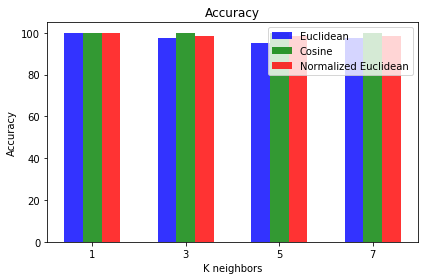

In [325]:
# data to plot
n_groups = 4
euclidean = (e1, e3, e5, e7)
cosine = (c1, c3, c5, c7)
normalized_euclidean = (ne1, ne3, ne5, ne7)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.20
opacity = 0.8

rects1 = plt.bar(index, euclidean, bar_width,
alpha=opacity,
color='b',
label='Euclidean')

rects2 = plt.bar(index + bar_width, cosine, bar_width,
alpha=opacity,
color='g',
label='Cosine')

rects3 = plt.bar(index + bar_width + bar_width, normalized_euclidean, bar_width,
alpha=opacity,
color='r',
label='Normalized Euclidean')



plt.xlabel('K neighbors')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.xticks(index + bar_width, ('1', '3', '5', '7'))
plt.legend()

plt.tight_layout()
plt.show()

### Final Accuracy using test dataset

In [331]:
#KNN algorithm

###Calculating Distances between test and development set rows
## using above mentioned distance metrics
def KNN_algo(x_test,x_develop,k,metric):
    rows = x_test.shape[0]
    columns = x_develop.shape[0]

    ##initializing arrays of array
    Edistance = np.zeros((rows,columns))
    Cdistance = np.zeros((rows,columns))
    NEdistance = np.zeros((rows,columns))


    for row in range(rows):
        for col in range(columns):
            #for euclidean
            Edistance[row,col] = euclidean_distance(x_test[row], x_develop[col])
            #for cosine similarity
            Cdistance[row,col] = cosine_similarity(x_test[row], x_develop[col])
            #for normalized euclidean distance
            NEdistance[row,col] = normalized_euclidean_distance(x_test[row], x_develop[col])

    #print (Edistance)#Euclidean distance
    #print (Cdistance)#Cosine Similarity
    #print (NEdistance)#Normalized Euclidean distance

    if metric.lower()=='euclidean':
        rows = Edistance.shape[0]
        E_pred = []
        
        for i in range(rows):
            E_y_indexes = np.argsort(Edistance[i,:])
            Eclosest = y_develop[E_y_indexes[:k]]
            Evalue = Counter(Eclosest).most_common()
            E_pred.append(Evalue[0][0])
   
        #print(E_pred)
        num_correct = np.sum(E_pred == y_test)
        accuracy = float(num_correct)/y_test.shape[0]
        num_incorr = len(E_pred)-num_correct
    
    elif metric.lower()=='cosine':
        rows = Cdistance.shape[0]
        C_pred = []
        
        for i in range(rows):
            C_y_indexes = np.argsort(Cdistance[i,:])
            #print(C_y_indexes)
            Cclosest = y_develop[C_y_indexes[:k]]
            #print(Cclosest)
            Cvalue = Counter(Cclosest).most_common()
            #print(Cvalue)
            C_pred.append(Cvalue[0][0])
            
        #print(C_pred)
        #num_correct = np.sum(C_pred == y_test)
        #print(num_correct)
        num_correct = len(intersection(C_pred,y_test))
        accuracy = float(num_correct)/y_test.shape[0]
        num_incorr = len(C_pred)-num_correct
        
    elif metric.lower()=='normalized euclidean':
        rows = NEdistance.shape[0]
        NE_pred = []

        for i in range(rows):
            NE_y_indexes = np.argsort(NEdistance[i,:])
            NEclosest = y_develop[NE_y_indexes[:k]]
            NEvalue = Counter(NEclosest).most_common()
            NE_pred.append(NEvalue[0][0])   
            
        #print(NE_pred)
        num_correct = np.sum(NE_pred == y_test)
        accuracy = float(num_correct)/y_test.shape[0]
        num_incorr = len(NE_pred)-num_correct
    
    print('ACCURACY-------------------------------------------------------------')    
    print('Correctly classified instances:',num_correct)
    print('Incorrectly classified instances:',num_incorr)
    print("Accuracy based on",metric," with",k,"Neighbors:", accuracy*100,'%')
    print('---------------------------------------------------------------------')

    return accuracy



In [334]:
#using normalized euclidean as distance metric and K=7 for number of nearest neighbors
ne7 = KNN_algo(x_test,x_develop,7,'normalized euclidean') *100


ACCURACY-------------------------------------------------------------
Correctly classified instances: 28
Incorrectly classified instances: 2
Accuracy based on normalized euclidean  with 7 Neighbors: 93.33333333333333 %
---------------------------------------------------------------------
